# 1) Delivery_time -> Predict delivery time using sorting time 

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
data1 = pd.read_csv("delivery_time.csv")
data1

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [18]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
import pandas_profiling as pp
EDA_report = pp.ProfileReport(data1)
EDA_report.to_file(output_file = 'wcatreport.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [30]:
dataset=data1.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
dataset

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [31]:
dataset.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


0.825 represents the strong relationships  so we can proced with linear regression


C:\Users\saiki\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='delivery_time', ylabel='Density'>

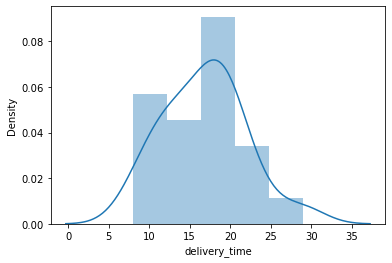

In [33]:
import seaborn as sns 
sns.distplot(dataset['delivery_time'])

C:\Users\saiki\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sorting_time', ylabel='Density'>

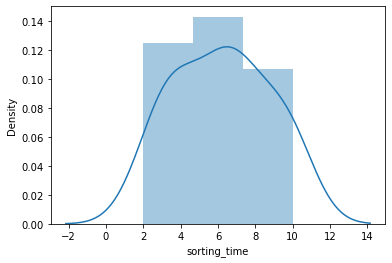

In [34]:
import seaborn as sns 
sns.distplot(dataset['sorting_time'])

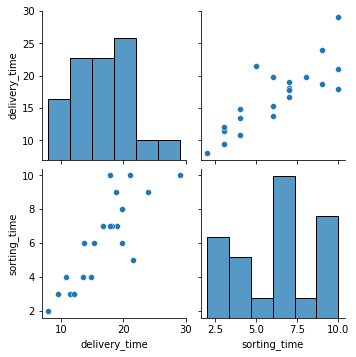

In [35]:
sns.pairplot(dataset)

<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

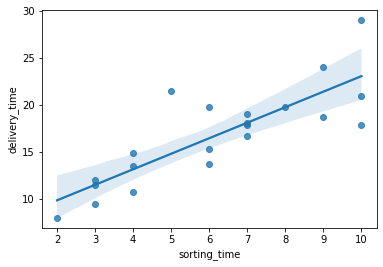

In [36]:
sns.regplot(x=dataset['sorting_time'],y=dataset['delivery_time'])

In [37]:
import  statsmodels.formula.api as smf
model=smf.ols("delivery_time~sorting_time",data=dataset).fit()
#linear regression function called as ols ordirary least square method 
# find the best line with best estimates 
# in smf ols function it take input as y~x 

In [38]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 05 Feb 2022   Prob (F-statistic):           3.98e-06
Time:                        18:51:20   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

intersept = beta0, sortingtime =beta1, p value should be <0.05
so for sorting time is significant 

delivarytime = 6.5827 + 1.6490(sortingtime) 
to see if our model is  stronger than base model 
fstats and propability of stats <0.05 so over model is strong model than base model

 and R2 value should be > 0.8 -->0.682 is not graterthan 0.8 so we have to do some transomartion on over columns
    so we 

we don't have any 0 values in our table so we can apply log trasformation 

Text(0, 0.5, 'delivery_time')

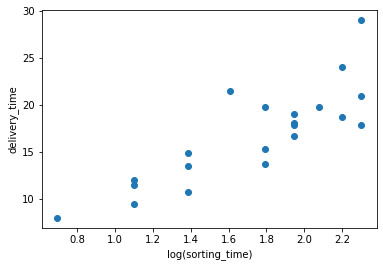

In [41]:
import matplotlib.pyplot as plt
x = np.log(dataset.sorting_time)
y = dataset.delivery_time
plt.scatter(x,y)
plt.xlabel("log(sorting_time)")
plt.ylabel("delivery_time")

In [43]:
import  statsmodels.formula.api as smf
dataset["logsorting_time"]=np.log(dataset.sorting_time)
model_log=smf.ols("delivery_time~logsorting_time",data =dataset).fit()

In [44]:
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Sat, 05 Feb 2022   Prob (F-statistic):           2.64e-06
Time:                        19:29:18   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.1597      2.455      0.472      0.642      -3.978       6.297
logsorting_time     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

rsquare value  not grater than 0.8

so iam applying log on delivery time 

Text(0, 0.5, 'log(delivery_time)')

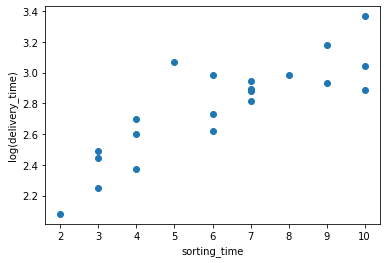

In [46]:
import matplotlib.pyplot as plt
x = dataset.sorting_time
y = np.log(dataset.delivery_time)
plt.scatter(x,y)
plt.xlabel("sorting_time")
plt.ylabel("log(delivery_time)")

In [47]:
import  statsmodels.formula.api as smf
dataset["logdelivery_time"]=np.log(dataset.delivery_time)
model_log2=smf.ols("logdelivery_time~sorting_time",data =dataset).fit()
model_log2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       logdelivery_time   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Sat, 05 Feb 2022   Prob (F-statistic):           1.59e-06
Time:                        19:35:23   Log-Likelihood:                 7.7920
No. Observations:                  21   AIC:                            -11.58
Df Residuals:                      19   BIC:                            -9.495
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
sorting_time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

log(delivarytime) = 2.1214+ 0.1056(sortingtime) to see if our model is stronger than base model fstats and propability of stats <0.05 so over model is strong model than base model

and R2 value should be > 0.8 -

<AxesSubplot:xlabel='sorting_time', ylabel='logdelivery_time'>

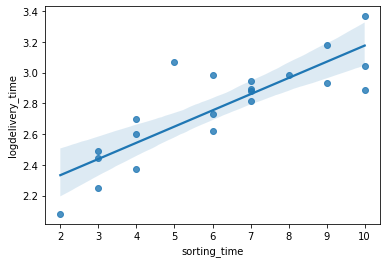

In [48]:
sns.regplot(x="sorting_time",y="logdelivery_time",data=dataset)

In [50]:
import  statsmodels.formula.api as smf
dataset["sqrtsorting_time"]=np.sqrt(dataset.sorting_time)
model_sqrt_st=smf.ols("delivery_time~sqrtsorting_time",data =dataset).fit()
model_sqrt_st.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Sat, 05 Feb 2022   Prob (F-statistic):           2.61e-06
Time:                        20:01:53   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -2.5188      2.995     -0.841      0.411      -8.788       3.751
sqrtsorting_time     7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
import  statsmodels.formula.api as smf
dataset["sqrtdelivery_time"]=np.sqrt(dataset.delivery_time)
model_sqrt_dt=smf.ols("sqrtdelivery_time~sorting_time",data =dataset).fit()
model_sqrt_dt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      sqrtdelivery_time   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     45.20
Date:                Sat, 05 Feb 2022   Prob (F-statistic):           2.00e-06
Time:                        20:03:01   Log-Likelihood:                -6.6646
No. Observations:                  21   AIC:                             17.33
Df Residuals:                      19   BIC:                             19.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.7727      0.205     13.527      0.000       2.344       3.202
sorting_time     0.2066      0.031      6.723      0.000       0.142       0.271
==============================================================================
Omnibus:                        2.228   Durbin-Watson:                   1.258
Prob(Omnibus):                  0.328   Jarque-Bera (JB):                1.195
Skew:                           0.580   Prob(JB):                        0.550
Kurtosis:                       3.142   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
import  statsmodels.formula.api as smf
dataset["powersorting_time"]=np.power((dataset.sorting_time),2)
model_power_st=smf.ols("delivery_time~powersorting_time",data =dataset).fit()
model_power_st.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     32.39
Date:                Sat, 05 Feb 2022   Prob (F-statistic):           1.74e-05
Time:                        20:05:14   Log-Likelihood:                -52.948
No. Observations:                  21   AIC:                             109.9
Df Residuals:                      19   BIC:                             112.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            11.2372      1.196      9.399      0.000       8.735      13.740
powersorting_time     0.1249      0.022      5.691      0.000       0.079       0.171
==============================================================================
Omnibus:                        1.531   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.465   Jarque-Bera (JB):                0.772
Skew:                           0.469   Prob(JB):                        0.680
Kurtosis:                       3.050   Cond. No.                         94.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""